## Imports

In [ ]:
%load_ext autoreload
%autoreload 1

In [2]:
import os
os.environ['TFDS_DATA_DIR'] = '/media/data/jacob/tensorflow_datasets'

from pyleaves.utils import set_tf_config
set_tf_config(num_gpus=1)

import tensorflow as tf
import tensorflow.keras.backend as K
import numpy as np
from pprint import pprint as pp
from pathlib import Path
model_dir = '.'
from sklearn.model_selection import train_test_split
# from tfrecord_utils.img_utils import resize_repeat
from boltons.funcutils import partial
import random
import math
import sys
from typing import Tuple
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt


setGPU: Setting GPU to: [7]
Initial visible GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
visible GPUs: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Successfully set memory_growth=True and limited GPUs visible to tensorflow.

Now using GPU(s):
['/physical_device:GPU:0']


In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
# from scipy.stats import norm, spearmanr, wasserstein_distance
# from skimage.metrics import structural_similarity
from pyleaves.utils.WandB_artifact_utils import load_Leaves_Minus_PNAS_dataset, load_dataset_from_artifact
import wandb
from wandb.keras import WandbCallback

from omegaconf import OmegaConf
from sklearn.model_selection import train_test_split


config = OmegaConf.create({'seed':49, #237,
                           'target_size':(1024,1024),#(512,512), #(512,512),
                           'batch_size':8,
                           'augmentations':{'flip':1.0},#,'rotate':1.0},
                           'num_parallel_calls':-1,
                           'fit_class_weights':False,
                           'num_epochs':75,
                           'base_lr':1e-3,
                           'warmup_learning_rate':1e-04,
                           'lr_attack':6,
                           'lr_sustain':1,
                           'kernel_l2':1e-3,
                           'dataset_name': 'PNAS', #'Leaves-PNAS',#
                           'threshold': 100,
                           'test_size': 0.5,
                           'validation_split':0.1,
                           'use_tfrecords':True,
                           'samples_per_shard':400,
                           'tfrecord_dir':'/media/data/jacob/tfrecords/PNAS'}
                         )


config = OmegaConf.create({'seed':49, #237,
                           'target_size':(256,256),#,1024),#(512,512), #(512,512),
                           'batch_size':8,
                           'augmentations':{'flip':1.0},#,'rotate':1.0},
                           'num_parallel_calls':-1,
                           'fit_class_weights':False,
                           'num_epochs':75,
                           'base_lr':1e-3,
                           'warmup_learning_rate':1e-04,
                           'lr_attack':6,
                           'lr_sustain':1,
                           'kernel_l2':1e-3,
                           'dataset_name': 'Leaves-PNAS',#
                           'threshold': 4,
                           'test_size': 0.3,
                           'validation_split':0.1,
                           'use_tfrecords':True,
                           'samples_per_shard':400,
                           'tfrecord_dir':'/media/data/jacob/tfrecords/Leaves-PNAS'}
                         )






print(OmegaConf.to_yaml(config))

os.makedirs(config.tfrecord_dir, exist_ok=True)
WANDB_CREDENTIALS = {"entity":"jrose",
                     "project":"Leaves_vs_PNAS",
                     "dir":"/media/data_cifs_lrs/projects/prj_fossils/users/jacob/WandB_artifacts"}

train_df, test_df = load_dataset_from_artifact(dataset_name=config.dataset_name, threshold=config.threshold, test_size=config.test_size, version='latest')
train_df, val_df = train_test_split(train_df, test_size=config.validation_split, random_state=config.seed, shuffle=True, stratify=train_df.family)


/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/wandb/vendor/graphql-core-1.1/graphql/type/directives.py:55: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  assert isinstance(locations, collections.Iterable), 'Must provide locations for directive.'
Failed to query for notebook name, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable


seed: 49
target_size:
- 256
- 256
batch_size: 8
augmentations:
  flip: 1.0
num_parallel_calls: -1
fit_class_weights: false
num_epochs: 75
base_lr: 0.001
warmup_learning_rate: 0.0001
lr_attack: 6
lr_sustain: 1
kernel_l2: 0.001
dataset_name: Leaves-PNAS
threshold: 4
test_size: 0.3
validation_split: 0.1
use_tfrecords: true
samples_per_shard: 400
tfrecord_dir: /media/data/jacob/tfrecords/Leaves-PNAS



wandb: Currently logged in as: jrose (use `wandb login --relogin` to force relogin)
wandb: wandb version 0.10.12 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


artifact_dir = ./artifacts/Leaves-PNAS_70-30:v1


In [4]:
%autoreload 2
from genetic_algorithm.datasets.pnas import load_and_extract_pnas, load_and_preprocess_data


# data, class_encoder = load_and_extract_pnas(threshold=100,
#                           validation_split=0.1,
#                           seed=None,
#                           x_col='path',
#                           y_col='family',
#                           uuid_col='catalog_number')

/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'datasets_c', 'hypertune_c', 'layers_c', 'models_c', 'preprocess_c', 'pretraining_c', 'training_c']


/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


wandb: wandb version 0.10.12 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


artifact_dir = ./artifacts/PNAS_family_100_50-50:v1


In [10]:
len(data['train'])

/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


75

In [5]:
from box import Box
data_config = Box({'load':{
                        'dataset_name':'plant_village',
                        'split':['train[0%:60%]','train[60%:70%]','train[70%:100%]'],
                        'data_dir':'/media/data/jacob/tensorflow_datasets'
                        },
                    'preprocess' : {
                                    'batch_size':32,
                                    'target_size':[256,256],
                                    'threshold':100
                                    }
                  })


data, class_encoder = load_and_preprocess_data(data_config)

/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


wandb: wandb version 0.10.12 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade


artifact_dir = ./artifacts/PNAS_family_100_50-50:v1


In [6]:
data

/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'train': <PrefetchDataset shapes: ((None, 256, 256, 3), (None, 19)), types: (tf.float32, tf.float32)>,
 'val': <PrefetchDataset shapes: ((None, 256, 256, 3), (None, 19)), types: (tf.float32, tf.float32)>,
 'test': <PrefetchDataset shapes: ((None, 256, 256, 3), (None, 19)), types: (tf.float32, tf.float32)>}

In [7]:

from tqdm.notebook import trange, tqdm
from box import Box
import tensorflow as tf
import numpy as np

from pprint import pprint as pp

# tf.reset_default_graph()

def count_model_params(model, verbose=True):
    param_counts = {'trainable_params':
                          np.sum([K.count_params(w) for w in model.trainable_weights]),
                    'non_trainable_params':
                          np.sum([K.count_params(w) for w in model.non_trainable_weights])
                   }
    param_counts['total_params'] = param_counts['trainable_params'] + param_counts['non_trainable_params']
             
    if verbose:
        pp({k:f'{v:,}' for k,v in param_counts.items()})
    return param_counts




def calculate_tf_data_image_stats(dataset: tf.data.Dataset, summary=False):

    stats = Box({'min':[],
                 'max':[],
                 'mean':[],
                 'std':[],
                 'sum':[],
                 'count':[]})

    for x,y in tqdm(dataset):
        stats.min.extend([tf.reduce_min(x).numpy()])
        stats.max.extend([tf.reduce_max(x).numpy()])
        stats.mean.extend([tf.reduce_mean(x).numpy()])
        stats.std.extend([tf.math.reduce_std(x).numpy()])
        stats.sum.extend([tf.reduce_sum(x).numpy()])
        stats.count.extend([len(x)])

    if summary:
        summary_stats = Box({'min':np.min(stats.min),
                            'max':np.max(stats.max),
                            'mean':np.mean(stats.mean),
                            'std':np.std(stats.std),
                            'sum':np.sum(stats.sum),
                            'count':np.sum(stats.count)})
        return summary_stats
    return stats

In [9]:

for subset in data.keys():
    print(subset)
    print(calculate_tf_data_image_stats(data[subset],summary=True))#.map(lambda row: (row['x'], row['y'])), summary=True))

train


/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



{'min': 0.0, 'max': 255.0, 'mean': 179.32895, 'std': 1.3738362, 'sum': 84217880000.0, 'count': 2389}
val



{'min': 0.0, 'max': 255.0, 'mean': 178.27281, 'std': 1.918568, 'sum': 9330841000.0, 'count': 266}
test



{'min': 0.0, 'max': 255.0, 'mean': 178.74216, 'std': 1.4766371, 'sum': 93337520000.0, 'count': 2656}


In [ ]:
stats

In [ ]:
%debug

In [7]:
train_df.describe(include='all')

/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order,family,genus,species,old_family,catalog_number,formal_dataset,dataset,collection,collection_type,...,raw_path,path,ext,Genus in Plantlist/WFO?,"Genus (or species) status, PlantList/WFO",Comments,Corrected data field,filename,subset,archive_path
count,14548,14548,14548,14542,14548,14548,14548,14548,14548,14548,...,14548,14548,14548,14548,14538,719,58,14548,14548,14548
unique,63,253,3466,5472,332,14548,1,1,4,2,...,14548,14548,1,4,9,35,6,14548,1,14548
top,Sapindales,Fabaceae,Quercus,japonica,Fabaceae,Wolfe_2441,X-Rays and Clear Leaves,Leaves,wolfe,cleared_leaves,...,/media/data_cifs_lrs/projects/prj_fossils/data...,/media/data_cifs_lrs/projects/prj_fossils/data...,.jpg,Yes,accepted,family is correct,genus,Penaeaceae_Axinandra_coriacea_Wolfe_8173.jpg,train,/media/data_cifs_lrs/projects/prj_fossils/data...
freq,1455,1162,175,72,962,1,14548,14548,8609,13330,...,1,1,14548,14444,14060,267,35,1,14548,1


In [8]:
val_df.describe(include='all')

/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order,family,genus,species,old_family,catalog_number,formal_dataset,dataset,collection,collection_type,...,raw_path,path,ext,Genus in Plantlist/WFO?,"Genus (or species) status, PlantList/WFO",Comments,Corrected data field,filename,subset,archive_path
count,1617,1617,1617,1617,1617,1617,1617,1617,1617,1617,...,1617,1617,1617,1617,1616,79,3,1617,1617,1617
unique,55,201,993,1156,205,1617,1,1,4,2,...,1617,1617,1,2,4,8,2,1617,1,1617
top,Sapindales,Fabaceae,Quercus,mexicana,Fabaceae,Hickey_5607,X-Rays and Clear Leaves,Leaves,wolfe,cleared_leaves,...,/media/data_cifs_lrs/projects/prj_fossils/data...,/media/data_cifs_lrs/projects/prj_fossils/data...,.jpg,Yes,accepted,family is correct,genus,Fabaceae_Poecilanthe_effusa_Wolfe_9476.jpg,train,/media/data_cifs_lrs/projects/prj_fossils/data...
freq,162,129,19,12,113,1,1617,1617,945,1475,...,1,1,1617,1606,1565,26,2,1,1617,1


## Scratch

In [2]:
# save_dir = '/media/data/jacob/GitHub/genetic_algorithm/tests/example_results/cifar100'

# n_layers=50
# n_classes = 100
# target_size = (128,128,3)
# num_classes = 100
# (x_train, y_train), (x_test, y_test) = cifar100.load_data()

# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))##.batch(1)
# test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))#.batch(1)

# h, w = target_size[:2]

# def _map_fn(img):
#     img = tf.image.convert_image_dtype(img, tf.float32)
#     shape = tf.shape(img)
#     tf.print(shape,  output_stream=sys.stdout)
#     print(shape)
#     print(img.shape)
#     maxside = tf.math.maximum(shape[0],shape[1])
#     minside = tf.math.minimum(shape[0],shape[1])
#     new_img = img

#     if tf.math.divide(maxside,minside) > 1.3:
#         repeat = tf.math.floor(tf.math.divide(maxside,minside))  
#         new_img = img
#         if tf.math.equal(shape[1],minside):
#             for i in range(int(repeat)):
#                 new_img = tf.concat((new_img, img), axis=1) 
#         if tf.math.equal(shape[0],minside):
#             for i in range(int(repeat)):
#                 new_img = tf.concat((new_img, img), axis=0) 
#             new_img = tf.image.rot90(new_img)
#     else:
#         new_img = img

#     img = tf.image.resize(new_img, (h,w))
#     return img
        
# #     img = tf.image.resize(new_img, tuple((h,w)))
# #     return img


## Load 1 sample image (It's a bird!)

In [4]:
def load_sample_image():
    image_path = tf.keras.utils.get_file('Birds_sample_image.jpg',
                                       'https://upload.wikimedia.org/wikipedia/commons/0/09/The_smaller_British_birds_%288053836633%29.jpg')

    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)
    return img

def load_sample_image_test():
    img = load_sample_image()
    assert img.shape.as_list() == [2951, 1814,3]
    print('Success')
    
load_sample_image_test()
img = load_sample_image()

Success


## Resize_Repeat

In [5]:
# h, w = 128, 128

def resize_repeat(height: int=224, width: int=224):
    @tf.function
    def _map_fn(img):
#         img = tf.cast(img, tf.float32)
#         img = tf.image.random_flip_left_right(img)
        maxside = tf.math.maximum(tf.shape(img)[0],tf.shape(img)[1])
        minside = tf.math.minimum(tf.shape(img)[0],tf.shape(img)[1])
        new_img = img

#         tf.print(minside, maxside)
#         tf.print(tf.shape(img), 'minside', minside, 'maxside', maxside)

        aspect_ratio = tf.math.divide(maxside,minside)
        if aspect_ratio > 1.3:
            repeat = int(tf.math.floor(tf.math.divide(maxside,minside)))

            if tf.math.equal(tf.shape(img)[1],minside):
                # if width is the smallest size
    #             new_img = tf.repeat(img, repeats=repeat, axis=1) 
                new_img = tf.tile(img, multiples=[1,repeat,1])

            if tf.math.equal(tf.shape(img)[0],minside):
                # if height is the smallest size
    #             new_img = tf.repeat(img,repeats=repeat, axis=0) 
                new_img = tf.tile(img, multiples=[repeat,1,1])
                new_img = tf.image.rot90(new_img)

        img = tf.image.resize(new_img, (height, width))
        return img
    return _map_fn

## Test rot90 augmentation

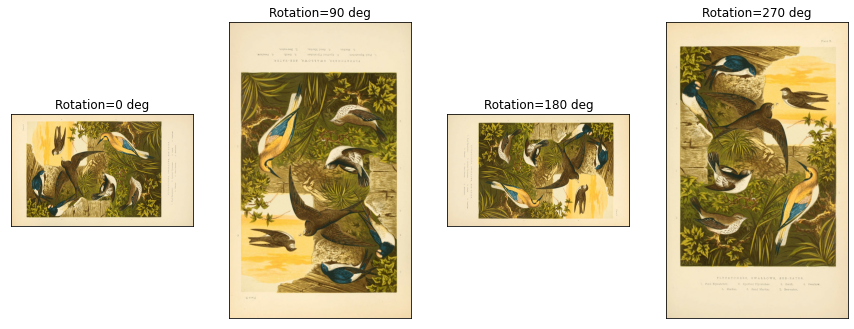

In [6]:
## Tests

def test_rot90(generate_plots=False):    
    x_in = load_sample_image()
    
    
    keep = []
    for i in range(4):
        x_in = tf.image.rot90(x_in)
        keep.append((90*i,x_in))

    
    if generate_plots:
        num_plots = len(keep)
        fig, ax = plt.subplots(1,num_plots, figsize=(15,15*num_plots))
        for i, (angle, x_i) in enumerate(keep):
            ax[i].imshow(x_i)
            ax[i].set_xticks([]); ax[i].set_yticks([])
            ax[i].set_title(f'Rotation={angle} deg')
            


test_rot90(generate_plots=True)

In [7]:
def resize_wide_image_test(input_resolutions = [64,224,512,768], generate_plots=False):
    x_in = load_sample_image()
    x_in = tf.image.rot90(x_in)
    
    keep = []
    for size in input_resolutions:
        resize_func = resize_repeat(height=size, width=size)
        x_out = resize_func(x_in)
        
        print(f'testing resizing function to image shape ({size},{size})')
        print(f'x_in.shape = {x_in.shape}, x_out.shape = {x_out.shape}')
        
        if generate_plots:
            keep.append(x_out)
            
            
    if generate_plots:
        num_plots = len(input_resolutions)
        fig, ax = plt.subplots(1,num_plots, figsize=(15,15*num_plots))
        for i, x_i in enumerate(keep):
            ax[i].imshow(x_i/255.0)
            
            
def resize_tall_image_test(input_resolutions = [64,224,512,768], generate_plots=False):
    x_in = load_sample_image()
#     x_in = tf.image.rot90(x_in)
    
    keep = []
    for size in input_resolutions:
        resize_func = resize_repeat(height=size, width=size)
        x_out = resize_func(x_in)
        
        print(f'testing resizing function to target size ({size},{size})')
        print(f'x_in.shape = {x_in.shape}, x_out.shape = {x_out.shape}')
        
        if generate_plots:
            keep.append(x_out)
            
            
    if generate_plots:
        num_plots = len(input_resolutions)
        fig, ax = plt.subplots(1,num_plots, figsize=(15,15*num_plots))
        for i, x_i in enumerate(keep):
            ax[i].imshow(x_i/255.0)

#     x_in = tf.image.resize(x,(256,1024))
#     x_out = _map_fn(x_in)

## Load full dataset & set notebook parameters

In [1]:
import os
import json

save = '/media/data/jacob/GitHub/genetic_algorithm/tests/example_results/plant_village'

if os.path.exists(f'{save}/warmup/chkpt.index'):
    with open(save + '/warmup/hp.json', 'r') as f:
        data = json.load(f)
        s_lr, e_lr, epochs = data['s_lr'], data['e_lr'], data['epochs']
        
print(data)

{'s_lr': 1e-06, 'e_lr': 0.001, 'epochs': 5}


In [8]:
from omegaconf import DictConfig
from genetic_algorithm.datasets.plant_village import ClassLabelEncoder, load_and_preprocess_data

# config = DictConfig({
#                     'dataset_name':'cifar100'
#                     })

data_config = DictConfig({
                    'load':{
                            'dataset_name':'plant_village',
                            'split':['train[0%:60%]','train[60%:70%]','train[70%:100%]'],
                            'data_dir':'/media/data/jacob/tensorflow_datasets'
                            },
                    'preprocess':{
                                    'batch_size':32,
                                    'target_size':[256,256]
                                    }
                        })



save_dir = '/media/data/jacob/GitHub/genetic_algorithm/tests/example_results/cifar100'
n_layers=50

if data_config.load.dataset_name == 'cifar100':
    num_classes = 100
    validation_split = 0.2
    seed = 42
#     n_classes = 100
    (x_train, y_train), (x_test, y_test) = cifar100.load_data()
    (x_train, y_train), (x_val, y_val) = train_test_split(x_train,
                                                          y_train,
                                                          test_size=validation_split,
                                                          random_state=seed, 
                                                          shuffle=True,
                                                          stratify=y_train)
    
    train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
    val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
    test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
    data = {'train':train_dataset, 'val':val_dataset, 'test':test_dataset}
    
elif data_config.load.dataset_name == 'plant_village':
    num_classes = 38
#     n_classes = 38
    data, class_encoder = load_and_preprocess_data(data_config)
    
    train_dataset = data['train']
    val_dataset = data['val']
    test_dataset = data['test']
    
    
else:
    raise Exception(f'[ERROR] invalid dataset_name value provided: {config.load.dataset_name}')


    
    
batch_size = data_config.preprocess.batch_size

# assert batch_size == train_dataset.element_spec[1].shape[1] == data['train'].element_spec[1].shape[1]

assert num_classes == train_dataset.element_spec[1].shape[1] == data['train'].element_spec[1].shape[1]


steps_per_epoch = len(data['train'])
validation_steps = len(data['val'])
test_steps = len(data['test'])

num_samples = {k:len(v) for k,v in data.items()}
pp(num_samples)

/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/wandb/vendor/graphql-core-1.1/graphql/type/directives.py:55: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  assert isinstance(locations, collections.Iterable), 'Must provide locations for directive.'


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'datasets_c', 'hypertune_c', 'layers_c', 'models_c', 'preprocess_c', 'pretraining_c', 'training_c']
Getting the TFDS dataset: plant_village
splits: ['train[0%:60%]', 'train[60%:70%]', 'train[70%:100%]']
Dataset Name: plant_village/1.0.2
        Num_samples: 54303
        Num_classes: 38
{'test': 510, 'train': 1019, 'val': 170}


## Assert shape constraints on loaded dataset

In [9]:

def test_x_y_shapes(dataset: tf.data.Dataset, batch_size=16, target_size=(224,224), num_classes=38, name=''):
    ''' Check that the first batch of a tf.data.Dataset conforms to specified shape constraints for both x and y.
    
    '''
    x, y = next(iter(dataset))

    assert x.shape[0] == batch_size
    assert x.shape[1] == target_size[0]
    assert x.shape[2] == target_size[1]
    assert x.shape[3] == 3

    assert y.shape[0] == batch_size
    assert y.shape[1] == num_classes == dataset.element_spec[1].shape[1]

    
    print(f'Success: test_x_y_shapes({name}) -> x.shape = {x.shape}, y.shape = {y.shape}')


for subset_name, dataset in data.items():
    test_x_y_shapes(dataset=dataset, batch_size=batch_size, target_size=data_config.preprocess.target_size, num_classes=num_classes, name=subset_name)

# print(num_classes, train_dataset.element_spec[1].shape[1], data['train'].element_spec[1].shape[1])

/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Success: test_x_y_shapes(train) -> x.shape = (32, 256, 256, 3), y.shape = (32, 38)
Success: test_x_y_shapes(val) -> x.shape = (32, 256, 256, 3), y.shape = (32, 38)
Success: test_x_y_shapes(test) -> x.shape = (32, 256, 256, 3), y.shape = (32, 38)


## Collect summary statistics of data and loop once through each iterator

In [11]:
from tqdm.notebook import trange, tqdm
from box import Box


def calculate_tf_data_image_stats(dataset: tf.data.Dataset, summary=False):

    stats = Box({'min':[],
                 'max':[],
                 'mean':[],
                 'std':[],
                 'sum':[],
                 'count':[]})

    for x,y in tqdm(dataset):
        stats.min.extend([tf.reduce_min(x).numpy()])
        stats.max.extend([tf.reduce_max(x).numpy()])
        stats.mean.extend([tf.reduce_mean(x).numpy()])
        stats.std.extend([tf.math.reduce_std(x).numpy()])
        stats.sum.extend([tf.reduce_sum(x).numpy()])
        stats.count.extend([len(x)])

    if summary:
        summary_stats = Box({'min':np.min(stats.min),
                            'max':np.max(stats.max),
                            'mean':np.mean(stats.mean),
                            'std':np.std(stats.std),
                            'sum':np.sum(stats.sum),
                            'count':np.sum(stats.count)})
        return summary_stats
    return stats

######################################

print(f'Running calculate_tf_data_image_stats() on data subsets: {list(data.keys())}\n')
summary_stats = {subset:calculate_tf_data_image_stats(dataset=subset_data, summary=True) for subset, subset_data in data.items()}

for k, subset_stats in summary_stats.items():
    print(k)
    pp(subset_stats.to_dict())

# summary_stats = {'train': calculate_tf_data_image_summary_stats(dataset=train_dataset),
#                  'val': calculate_tf_data_image_summary_stats(dataset=val_dataset),
#                  'test': calculate_tf_data_image_summary_stats(dataset=test_dataset)

Running calculate_tf_data_image_stats() on data subsets dict_keys(['train', 'val', 'test'])



/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



train
{'count': 32582,
 'max': 1.0,
 'mean': 0.45204493,
 'min': 0.0,
 'std': 0.008120582,
 'sum': 2895820300.0}
val
{'count': 5430,
 'max': 1.0,
 'mean': 0.45124468,
 'min': 0.0,
 'std': 0.008623452,
 'sum': 481757700.0}
test
{'count': 16291,
 'max': 1.0,
 'mean': 0.4522392,
 'min': 0.0,
 'std': 0.008333429,
 'sum': 1448977900.0}


## Image Viewer UI

In [14]:
x_train, y_train = next(iter(train_dataset.unbatch().batch(batch_size*steps_per_epoch).take(1)))

/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
x_train.shape

TensorShape([32582, 256, 256, 3])

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

from ipywidgets import interact
from sklearn import datasets

# digits = datasets.load_digits()
# def browse_images(images, labels):
#     n = len(images))
#     def view_image(i):
#         plt.imshow(images[i]) #, cmap=plt.cm.gray_r, interpolation='nearest')
#         plt.title(f'Training: {labels[i]}')
#         plt.show()
#     interact(view_image, i=(0,n-1))
# browse_images(x_train.numpy()[:100], np.argmax(y_train.numpy()[:100],axis=1))

interactive(children=(IntSlider(value=49, description='i', max=99), Output()), _dom_classes=('widget-interact'…

In [65]:
def browse_images(images, labels):
    n = len(images)
    def view_image(i):
        plt.imshow(images[i]) #, cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(f'Training: {labels[i]}')
        plt.show()
    interact(view_image, i=(0,n-1))


x = x_train.numpy()[:100]
y = np.argmax(y_train.numpy()[:100],axis=1)


browse_images(x, y) #x_train.numpy()[:100], np.argmax(y_train.numpy()[:100],axis=1))

interactive(children=(IntSlider(value=16290, description='i', max=32581), Output()), _dom_classes=('widget-int…

In [63]:
from typing import List, Tuple
from functools import lru_cache

def browse_images(datasets: List[Tuple[np.ndarray]]):
    assert type(datasets) == list
    assert type(datasets[0]) == tuple
    assert len(datasets[0]) == 2
    
    num_sets = len(datasets)
    
    n = len(datasets[0][1])
    fig, ax = iplt.subplots(1,num_sets, figsize=(28,7))
#     @lru_cache(maxsize=32)
    def view_image(i):
#         fig4, ax4 = plt.subplots()
        for subset in range(num_sets):
            images, labels = datasets[subset]
            img = images[i]
            controls = iplt.imshow(img, vmin_vmax=("r", img.min(), img.max()), ax=ax[subset])
            ax[subset].imshow(img) #, cmap=plt.cm.gray_r, interpolation='nearest')
            ax[subset].set_title(f'Training: {labels[i]}')
        return None
            
    interact(view_image, i=(0,n-1), play_buttons='Left')# play_buttons=True)
    plt.show()

    
display_total = 120
imgs_per_window = 30
    
# x = x_train.numpy()#[:100]
# y = class_encoder.int2str(np.argmax(y_train.numpy(),axis=1))

# browsing_datasets = []

# imgs_per_window = 30
# for idx in range(0,120,imgs_per_window):
#     print(idx)
#     browsing_datasets.append((x[idx:idx+imgs_per_window], y[idx:idx+imgs_per_window]))


# for idx in range(:120:imgs_per_window):
#     print(idx)
browse_images(browsing_datasets)


# browse_images(x, y) #x_train.numpy()[:100], np.argmax(y_train.numpy()[:100],axis=1))

/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: module 'mpl_interactions.ipyplot' has no attribute 'subplots'

In [49]:
help(iplt.imshow)

Help on function interactive_imshow in module mpl_interactions.pyplot:

interactive_imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, vmin_vmax=None, origin=None, extent=None, autoscale_cmap=True, filternorm=True, filterrad=4.0, resample=None, url=None, ax=None, slider_formats=None, force_ipywidgets=False, play_buttons=False, controls=None, display_controls=True, **kwargs)
    Control an image using widgets.
    
    parameters
    ----------
    X : function or image like
        If a function it must return an image-like object. See matplotlib.pyplot.imshow for the
        full set of valid options.
    cmap : str or `~matplotlib.colors.Colormap`
        The Colormap instance or registered colormap name used to map
        scalar data to colors. This parameter is ignored for RGB(A) data.
        forwarded to matplotlib
    norm : `~matplotlib.colors.Normalize`, optional
        The `.Normalize` instance used to scale scalar data to the

/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


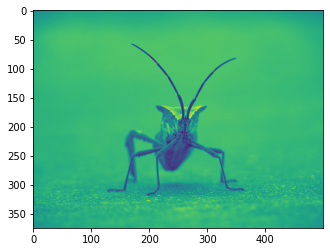

In [48]:
from mpl_interactions import ipyplot as iplt

img = plt.imread("https://matplotlib.org/3.3.1/_images/stinkbug.png")


fig4, ax4 = plt.subplots()
controls4 = iplt.imshow(img, vmin_vmax=("r", img.min(), img.max()))

In [46]:
(browsing_datasets[3][1])

['Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Strawberry___healthy',
 'Cherry___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Raspberry___healthy',
 'Pepper,_bell___healthy',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Late_blight',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Raspberry___healthy',
 'Corn___Cercospora_leaf_spot Gray_leaf_spot',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Soybean___healthy',
 'Soybean___healthy',
 'Soybean___healthy',
 'Pepper,_bell___healthy',
 'Tomato___Late_blight',
 'Squash___Powdery_mildew',
 'Squash___Powdery_mildew',
 'Cherry___Powdery_mildew',
 'Corn___Common_rust',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Cherry___Powdery_mildew',
 'Tomato___Target_Spot',
 'Cherry___Powdery_mildew',
 'Corn___Common_rust',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Soybean___healthy']

testing resizing function to target size (64,64)
x_in.shape = (1814, 2951, 3), x_out.shape = (64, 64, 3)
testing resizing function to target size (224,224)
x_in.shape = (1814, 2951, 3), x_out.shape = (224, 224, 3)
testing resizing function to target size (512,512)
x_in.shape = (1814, 2951, 3), x_out.shape = (512, 512, 3)
testing resizing function to target size (768,768)
x_in.shape = (1814, 2951, 3), x_out.shape = (768, 768, 3)
testing resizing function to target size (64,64)
x_in.shape = (2951, 1814, 3), x_out.shape = (64, 64, 3)
testing resizing function to target size (224,224)
x_in.shape = (2951, 1814, 3), x_out.shape = (224, 224, 3)
testing resizing function to target size (512,512)
x_in.shape = (2951, 1814, 3), x_out.shape = (512, 512, 3)
testing resizing function to target size (768,768)
x_in.shape = (2951, 1814, 3), x_out.shape = (768, 768, 3)


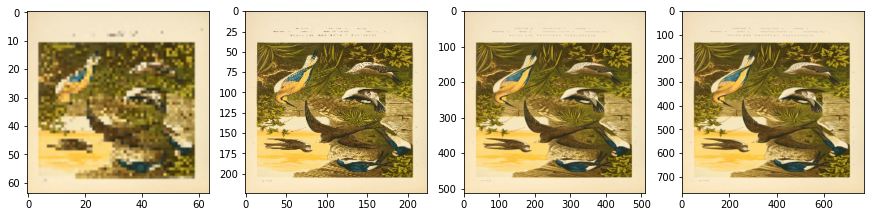

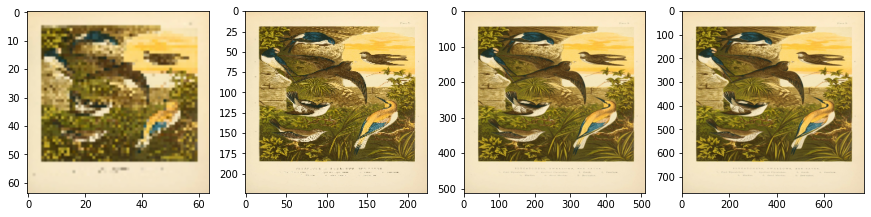

In [149]:
resize_wide_image_test(generate_plots=True)

resize_tall_image_test(generate_plots=True)

In [91]:
resize_func = resize_repeat(height=224, width=224)

/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [87]:
x, y=next(iter(train_dataset))


256 1024
[256 1024 3] minside 256 maxside 1024
4


In [88]:
print(x_in.shape, x_out.shape)

(256, 1024, 3) (128, 128, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


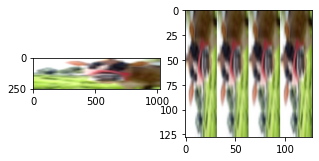

In [89]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(5,5))

ax[0].imshow(x_in.numpy()/225.0)
ax[1].imshow(x_out.numpy()/255.0)

In [68]:
x_in

/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<tf.Tensor: shape=(512, 1024, 3), dtype=float32, numpy=
array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [182., 194., 167.],
        [182., 194., 167.],
        [182., 194., 167.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [182., 194., 167.],
        [182., 194., 167.],
        [182., 194., 167.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [182., 194., 167.],
        [182., 194., 167.],
        [182., 194., 167.]],

       ...,

       [[ 87., 122.,  41.],
        [ 87., 122.,  41.],
        [ 87., 122.,  41.],
        ...,
        [138., 173.,  79.],
        [138., 173.,  79.],
        [138., 173.,  79.]],

       [[ 87., 122.,  41.],
        [ 87., 122.,  41.],
        [ 87., 122.,  41.],
        ...,
        [138., 173.,  79.],
        [138., 173.,  79.],
        [138., 173.,  79.]],

       [[ 87., 1

In [10]:
x_0 = tf.image.resize(x, (128,128))

/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
print(x.shape, x_0.shape)

(32, 32, 3) (128, 128, 3)


/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
resized_img = tf.function(_map_fn)(x_train[1,...])

resized_img.shape

/media/data/conda/jacob/envs/pyleaves2.3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


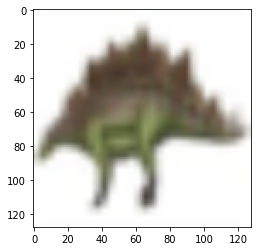

In [11]:
import matplotlib.pyplot as plt
# plt.imshow(x_train[1,...])
plt.imshow(resized_img)